In [154]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar

In [155]:
pdf = 'pdf\Virtual_Reality_in_stottertherapie_bij_jongvolwassenen.pdf'

In [156]:
all_pages = extract_pages(
    pdf,
    page_numbers=[5],
    maxpages=999
)

full_text = ""

for page_layout in all_pages:
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                full_text += text_line.get_text()

...

In [157]:
full_text = full_text.strip()

...

In [158]:
full_text[:10]

'“Het is zo'

In [159]:
len(full_text)

3500

In [160]:
import spacy
from langdetect import detect
import pandas as pd

dutch_spacy_model = "nl_core_news_md"

nlp = spacy.load(dutch_spacy_model) if detect(full_text) == 'nl' else spacy.load("en_core_word_md")
doc = nlp(full_text)

sentences = []

for sentence in doc.sents:
    sentences.append(str(sentence))


In [161]:
df = pd.DataFrame(sentences, columns=['sentence'])

In [162]:
df.head()

,sentence
0,“Het is zoals leren fietsen waarbij VR de rol ...
1,"een goed hulpmiddel, maar \nlangzaamaan kan je..."
2,” \nPrototype 2 \nBeleving door de personen di...
3,Het meer interactieve 360°-scenario met bijkom...
4,De testpersoon die ook het eerste prototype te...


In [163]:
import textstat
import re
import readability

def get_sentence_length(sentence):
    doc = nlp(sentence)
    return len(doc)

def calculate_fre_score(sentence):
    score = textstat.flesch_reading_ease(sentence)
    return score

def calculate_gunning_fog_score(sentence):
    score = textstat.gunning_fog(sentence)
    return score

def calculate_fre_score_readability(sentence):
    score = textstat.flesch_reading_ease(sentence)
    return score

In [164]:
df['sentence_length'] = df['sentence'].apply(get_sentence_length)
df['fre'] = df['sentence'].apply(calculate_fre_score)
df['fog'] = df['sentence'].apply(calculate_gunning_fog_score)

In [165]:
df.head()

,sentence,sentence_length,fre,fog
0,“Het is zoals leren fietsen waarbij VR de rol ...,15,66.74,11.35
1,"een goed hulpmiddel, maar \nlangzaamaan kan je...",11,71.82,8.20
2,” \nPrototype 2 \nBeleving door de personen di...,12,37.98,13.20
3,Het meer interactieve 360°-scenario met bijkom...,17,24.44,14.43
4,De testpersoon die ook het eerste prototype te...,45,56.26,19.00


In [166]:
df = df[df['sentence_length'] > 3]

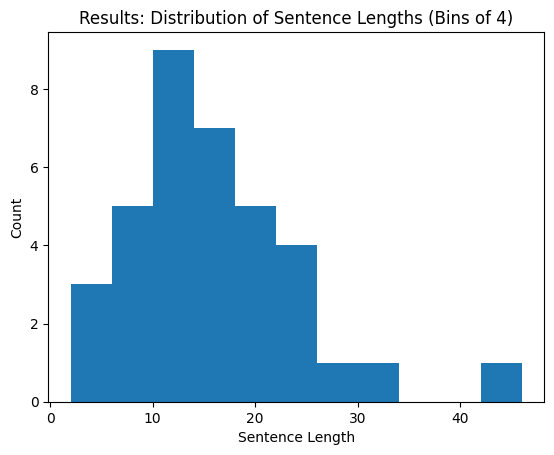

In [167]:
import matplotlib.pyplot as plt

bin_size = 4
df['bin_sentence'] = (df['sentence_length'] // bin_size) * bin_size

grouped = df.groupby('bin_sentence')['bin_sentence'].count().reset_index(name='count')

plt.bar(grouped['bin_sentence'], grouped['count'], width=bin_size)
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.title('Results: Distribution of Sentence Lengths (Bins of 4)')
plt.show()

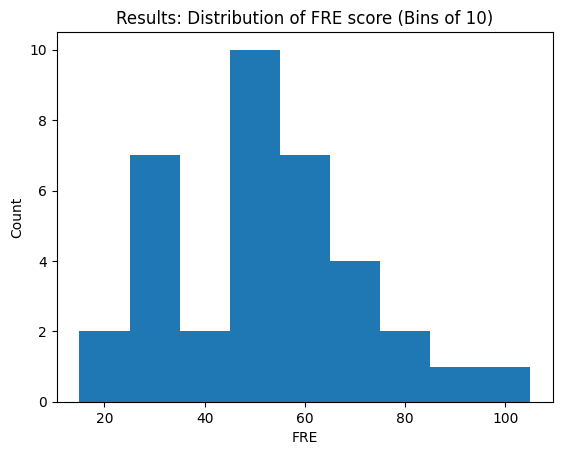

In [170]:
bin_size=10
df['bin_fre'] = (df['fre'] // bin_size) * bin_size

grouped = df.groupby('bin_fre')['bin_fre'].count().reset_index(name='count')

plt.bar(grouped['bin_fre'], grouped['count'], width=bin_size)
plt.xlabel('FRE')
plt.ylabel('Count')
plt.title('Results: Distribution of FRE score (Bins of 10)')
plt.show()

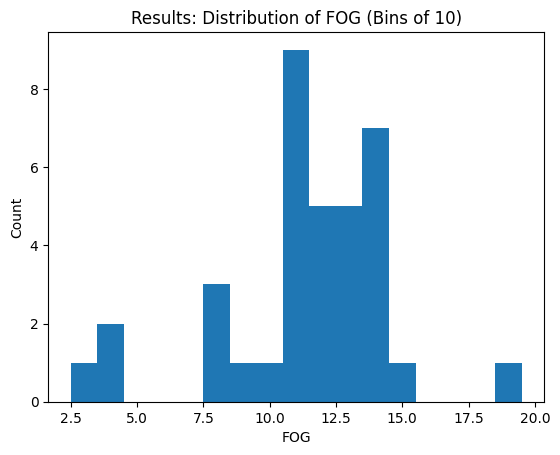

In [169]:
bin_size=1
df['bin_fog'] = (df['fog'] // bin_size) * bin_size

grouped = df.groupby('bin_fog')['bin_fog'].count().reset_index(name='count')

plt.bar(grouped['bin_fog'], grouped['count'], width=bin_size)
plt.xlabel('FOG')
plt.ylabel('Count')
plt.title('Results: Distribution of FOG')
plt.show()